In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8.0,6.0)

# How many color space in opencv

In [2]:
flag = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flag)
print(len(flag))

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

# Color space conversion 

Text(0.5, 1.0, 'grayImg')

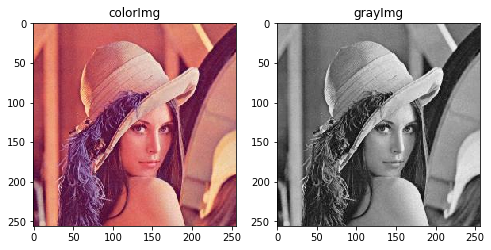

In [3]:
im = cv2.imread('lena.png')
# BGR->RGB
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# RGB->GRAY
img = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
plt.subplot(121)
plt.imshow(im)
plt.title('colorImg')

plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.title('grayImg')

Text(0.5, 1.0, 'labImg')

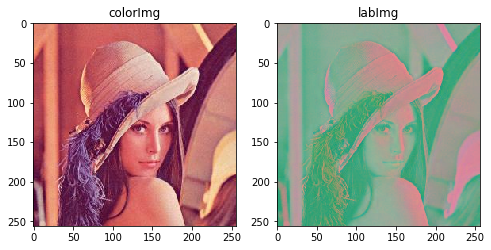

In [4]:
im = cv2.imread('lena.png')
# BGR->RGB
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# RGB->LAB
img = cv2.cvtColor(im, cv2.COLOR_RGB2LAB)
plt.subplot(121)
plt.imshow(im)
plt.title('colorImg')

plt.subplot(122)
plt.imshow(img)
plt.title('labImg')

Text(0.5, 1.0, 'hsvImg')

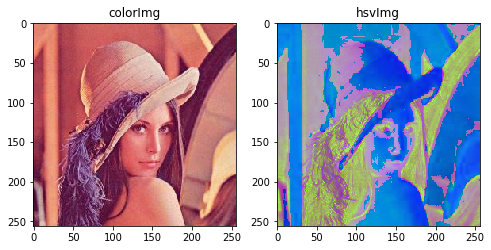

In [3]:
im = cv2.imread('lena.png')
# BGR->RGB
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# RGB->hsv
img = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
plt.subplot(121)
plt.imshow(im)
plt.title('colorImg')

plt.subplot(122)
plt.imshow(img)
plt.title('hsvImg')

In [6]:
cv2.cvtColor??

Docstring:
cvtColor(src, code[, dst[, dstCn]]) -> dst
.   @brief Converts an image from one color space to another.
.   
.   The function converts an input image from one color space to another. In case of a transformation
.   to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note
.   that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the
.   bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue
.   component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and
.   sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.
.   
.   The conventional ranges for R, G, and B channel values are:
.   -   0 to 255 for CV_8U images
.   -   0 to 65535 for CV_16U images
.   -   0 to 1 for CV_32F images
.   
.   In case of linear transformations, the range does not matter. But in case of a non-linear
.   transfo

# Application of HSV color space

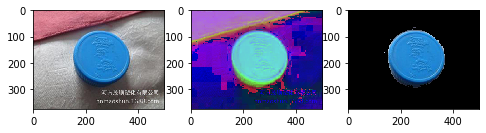

In [7]:
im = cv2.imread('bottle_cap.jpg')
imh = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

# find the bottle cap
lower_blue = np.array([100, 43, 46])
upper_blue = np.array([124, 255, 255])

mask = cv2.inRange(imh, lower_blue, upper_blue)
# contours, hierarchy= cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
res = cv2.bitwise_and(im, im, mask= mask)
    
plt.subplot(131)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(imh)
plt.subplot(133)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [32]:
res.shape

(375, 500, 3)

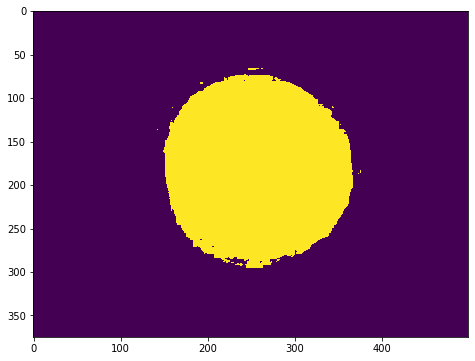

In [26]:
plt.imshow(mask)

# Canny edge detection

In [ ]:
cv2.Canny??

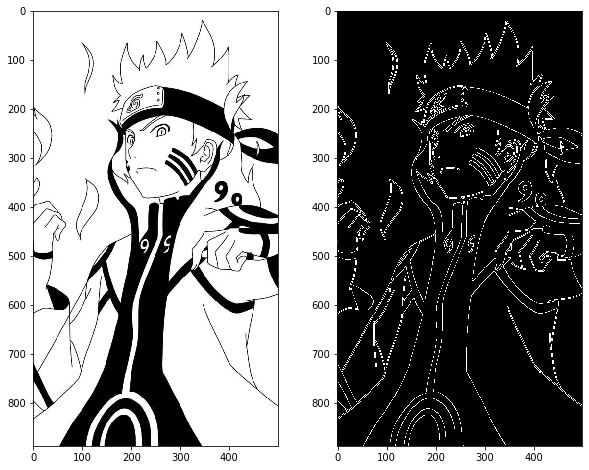

In [17]:
im = cv2.imread('huoying.jpg',0)
ime = cv2.Canny(im, 100,200)

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(ime, cmap= 'gray')

True

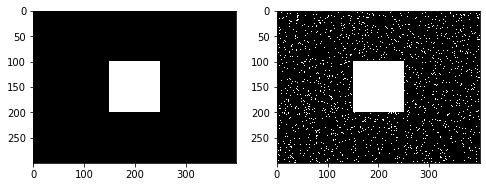

In [22]:
from skimage.util import random_noise

im = np.zeros((300,400), np.uint8)
h,w = im.shape
ch, cw= np.int(h/2), np.int(w/2)
n=50
im[ch-n:ch+n,cw-n:cw+n]=255

imn = random_noise(im, mode='pepper', seed=1)
imn = random_noise(imn, mode='salt', seed=1)
imn[imn==1]=255
plt.subplot(121)
plt.imshow(im, cmap = 'gray')

plt.subplot(122)
plt.imshow(imn, cmap = 'gray')
cv2.imwrite('bw.png',imn.astype(np.uint8))

In [19]:
np.max(imn)

1.0